In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [60]:
sales_df = pd.read_csv("sales_data.csv")

# Optional (not mandatory for sales project)
churn_df = pd.read_csv("customer_churn.csv")


In [62]:

sales_df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [64]:
sales_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [66]:
sales_df.isnull().sum()



Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

In [68]:
sales_df.columns = sales_df.columns.str.strip().str.lower()
sales_df.columns


Index(['date', 'product', 'quantity', 'price', 'customer_id', 'region',
       'total_sales'],
      dtype='object')

In [70]:
sales_df["date"] = pd.to_datetime(sales_df["date"])



In [72]:
sales_df["product"] = sales_df["product"].str.strip().str.title()


In [74]:
sales_df["year"] = sales_df["date"].dt.year
sales_df["month"] = sales_df["date"].dt.month
sales_df["day"] = sales_df["date"].dt.day


In [76]:
total_revenue = sales_df["total_sales"].sum()
total_revenue


12365048

In [78]:
top_customers = (
    sales_df.groupby("customer_id")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_customers


customer_id
CUST016    373932
CUST007    363870
CUST083    350888
CUST073    349510
CUST020    333992
Name: total_sales, dtype: int64

In [80]:
region_sales = (
    sales_df.groupby("region")["total_sales"]
    .sum()
    .sort_values(ascending=False)
)

region_sales


region
North    3983635
South    3737852
East     2519639
West     2123922
Name: total_sales, dtype: int64

In [82]:
monthly_sales = (
    sales_df.groupby(["year", "month"])["total_sales"]
    .sum()
    .reset_index()
)

monthly_sales


,year,month,total_sales
0,2024,1,4120524
1,2024,2,2656050
2,2024,3,4485006
3,2024,4,1103468


In [84]:
pivot_region_month = pd.pivot_table(
    sales_df,
    values="total_sales",
    index="month",
    columns="region",
    aggfunc="sum"
)

pivot_region_month


region,East,North,South,West
month,,,,
1,792969,1726624,1088182,512749
2,746674,640784,422941,845651
3,844016,1419350,1600314,621326
4,135980,196877,626415,144196


In [86]:
high_value_sales = sales_df[
    (sales_df["total_sales"] > 1000) &
    (sales_df["region"] == "North")
]

high_value_sales.head()


,date,product,quantity,price,customer_id,region,total_sales,year,month,day
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2024,1,2
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,2024,1,5
8,2024-01-09,Tablet,3,32791,CUST009,North,98373,2024,1,9
17,2024-01-18,Tablet,4,19322,CUST018,North,77288,2024,1,18
19,2024-01-20,Laptop,8,41749,CUST020,North,333992,2024,1,20


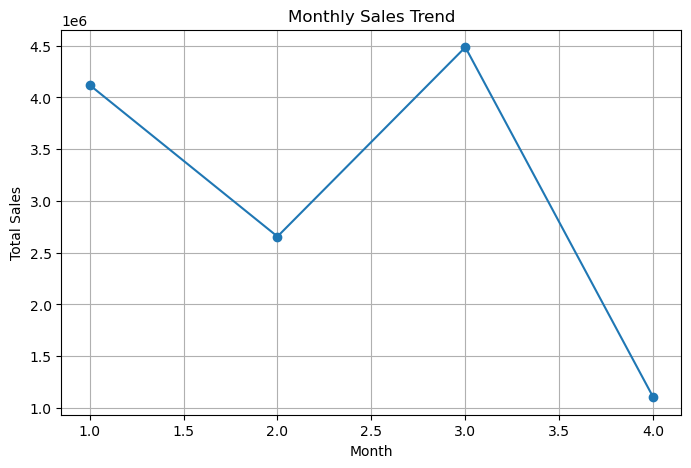

In [88]:
plt.figure(figsize=(8,5))
plt.plot(monthly_sales["month"], monthly_sales["total_sales"], marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


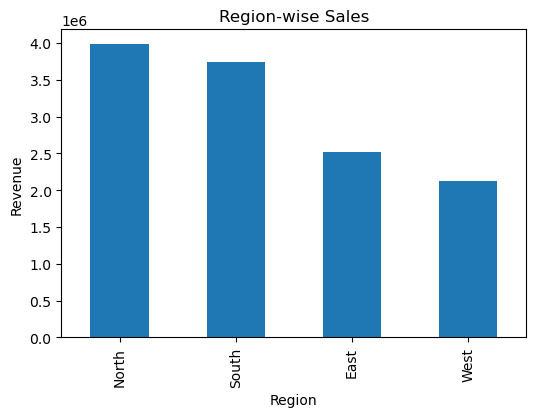

In [90]:
plt.figure(figsize=(6,4))
region_sales.plot(kind="bar")
plt.title("Region-wise Sales")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()


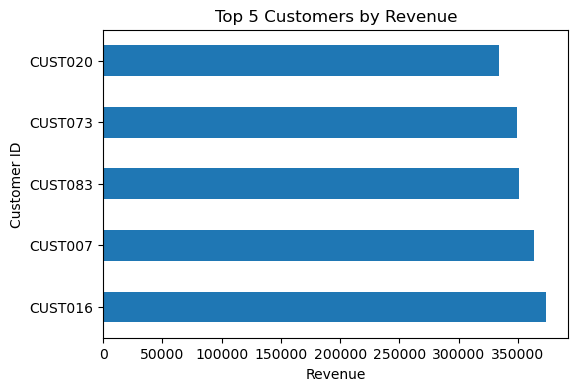

In [92]:
plt.figure(figsize=(6,4))
top_customers.plot(kind="barh")
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Customer ID")
plt.show()


In [94]:
print("CUSTOMER SALES ANALYSIS REPORT")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Customers: {sales_df['customer_id'].nunique()}")
print(f"Average Order Value: ${sales_df['total_sales'].mean():.2f}")
print(f"Top Customer: {top_customers.index[0]} - ${top_customers.iloc[0]:,.2f}")


CUSTOMER SALES ANALYSIS REPORT
Total Revenue: $12,365,048.00
Total Customers: 100
Average Order Value: $123650.48
Top Customer: CUST016 - $373,932.00
